# Sklearn Linear Model family 
- 여태까지 배운 방법들은 모두 Sklearn으로 구현할 수 있음.

## Linear Regression with Normal Equation

In [51]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [54]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [55]:
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [56]:
X = df.values
y = boston.target
y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

- `sklearn`에서의 `LinearRegression`은 Normal Equation으로 구현한 것

In [57]:
from sklearn.linear_model import LinearRegression
lr_ne = LinearRegression(fit_intercept = True)

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.33, random_state = 42
)

In [59]:
lr_ne.fit(X_train, y_train)

LinearRegression()

In [60]:
y_hat = lr_ne.predict(X_test)
y_true = y_test

In [61]:
rmse = np.sqrt(((y_hat - y_true) ** 2).sum() / len(y_true))
rmse

4.552364598463062

In [62]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_hat, y_true)
mse ** 0.5

4.552364598463062

Text(0.5, 1.0, 'Prices vs Predicted prices : $Y_i$ vs $\\hat{Y}_i$')

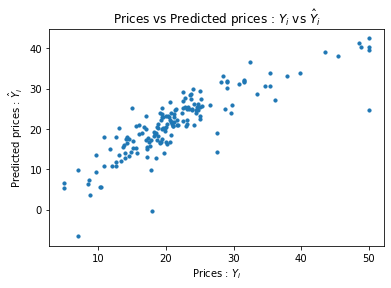

In [63]:
plt.scatter(y_true, y_hat, s = 10)
plt.xlabel("Prices : $Y_i$")
plt.ylabel("Predicted prices : $\hat{Y}_i$")
plt.title("Prices vs Predicted prices : $Y_i$ vs $\hat{Y}_i$")

## Linear Regression with SGD

In [84]:
from sklearn.linear_model import SGDRegressor
lr_SGD = SGDRegressor()

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.33, random_state = 42
)

In [86]:
lr_SGD.fit(X_train, y_train)

SGDRegressor()

In [87]:
y_hat = lr_SGD.predict(X_test)
y_true = y_test

In [88]:
mse = mean_squared_error(y_hat, y_true)
rmse = np.sqrt(((y_hat - y_true) ** 2).sum() / len(y_true))
rmse, mse

(244468911237261.53, 5.976504856153206e+28)

Text(0.5, 1.0, 'Prices vs Predicted prices : $Y_i$ vs $\\hat{Y}_i$')

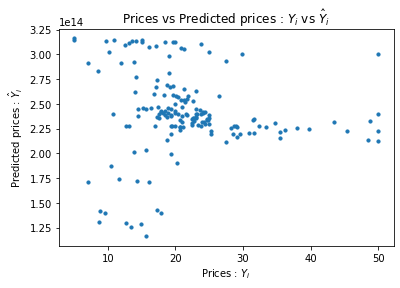

In [89]:
plt.scatter(y_true, y_hat, s = 10)
plt.xlabel("Prices : $Y_i$")
plt.ylabel("Predicted prices : $\hat{Y}_i$")
plt.title("Prices vs Predicted prices : $Y_i$ vs $\hat{Y}_i$")

- SGD는 Scaling이 필요함

In [90]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(X)
X_scaled = std_scaler.transform(X)

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size = 0.33, random_state = 42
)

In [92]:
lr_SGD.fit(X_train, y_train)

SGDRegressor()

In [93]:
y_hat = lr_SGD.predict(X_test)
y_true = y_test

In [94]:
mse = mean_squared_error(y_hat, y_true)
rmse = np.sqrt(((y_hat - y_true) ** 2).sum() / len(y_true))
rmse, mse

(4.597296164228738, 21.13513202163227)

Text(0.5, 1.0, 'Prices vs Predicted prices : $Y_i$ vs $\\hat{Y}_i$')

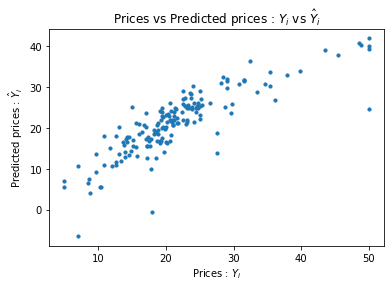

In [95]:
plt.scatter(y_true, y_hat, s = 10)
plt.xlabel("Prices : $Y_i$")
plt.ylabel("Predicted prices : $\hat{Y}_i$")
plt.title("Prices vs Predicted prices : $Y_i$ vs $\hat{Y}_i$")

## Linear Regression with Ridge & Lasso Regression
- Ridge & Lasso는 Normal Equation으로도, SGD로도 구할 수 있음.

In [96]:
from sklearn.linear_model import Lasso, Ridge

In [97]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size = 0.33, random_state = 42
)

In [98]:
ridge = Ridge(fit_intercept = True, alpha = 0.5) # 여기서 alpha는 lambda를 의미
ridge.fit(X_train, y_train)
# lasso = Lasso(fit_intercept = True, alpha = 0.5)

Ridge(alpha=0.5)

In [99]:
y_hat = ridge.predict(X_test)
y_true = y_test
mse = mean_squared_error(y_hat, y_true)
rmse = np.sqrt(((y_hat - y_true) ** 2).sum() / len(y_true))
rmse, mse

(4.553881119814411, 20.737833253402158)

Text(0.5, 1.0, 'Prices vs Predicted prices : $Y_i$ vs $\\hat{Y}_i$')

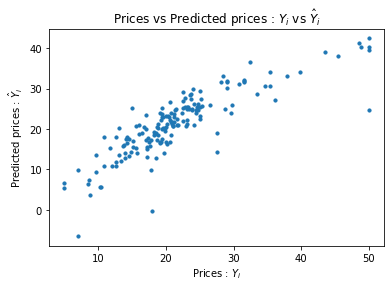

In [100]:
plt.scatter(y_true, y_hat, s = 10)
plt.xlabel("Prices : $Y_i$")
plt.ylabel("Predicted prices : $\hat{Y}_i$")
plt.title("Prices vs Predicted prices : $Y_i$ vs $\hat{Y}_i$")

- alpha를 변화시키면서 RMSE를 계산해봄
    - alpha(lambda)가 커질수록 train data에 대해 overfitting이 방지되는 것이기 때문에 당연하게 RMSE는 커짐

In [101]:
from sklearn.model_selection import KFold

print('Ridge Regression')
print('alpha\t RMSE_train\t RMSE_10cv\n')
alpha = np.linspace(0.01, 20, 50) # alpha는 여기서 lambda를 의미
t_rmse = np.array([])
cv_rmse = np.array([])

for a in alpha:
    ridge = Ridge(fit_intercept = True, alpha = a)

    # computing the RMSE on training data
    ridge.fit(X_train, y_train)
    p = ridge.predict(X_test)
    err = p - y_test
    total_error = np.dot(err, err)
    rmse_train = np.sqrt(total_error / len(p))

    # computing RMSE using 10-fold cross validation
    kf = KFold(10)
    xval_err = 0
    for train, test in kf.split(X):
        ridge.fit(X[train], y[train])
        p = ridge.predict(X[test])
        err = p - y[test]
        xval_err += np.dot(err, err)
    rmse_10cv = np.sqrt(xval_err / len(X))

    t_rmse = np.append(t_rmse, [rmse_train])
    cv_rmse = np.append(cv_rmse, [rmse_10cv])
    print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(a, rmse_train, rmse_10cv))

Ridge Regression
alpha	 RMSE_train	 RMSE_10cv

0.010	 4.5524		 5.8757
0.418	 4.5536		 5.8419
0.826	 4.5549		 5.8270
1.234	 4.5561		 5.8186
1.642	 4.5574		 5.8126
2.050	 4.5586		 5.8078
2.458	 4.5598		 5.8034
2.866	 4.5611		 5.7993
3.274	 4.5623		 5.7953
3.682	 4.5635		 5.7912
4.090	 4.5647		 5.7873
4.498	 4.5660		 5.7833
4.906	 4.5672		 5.7793
5.313	 4.5684		 5.7753
5.721	 4.5696		 5.7714
6.129	 4.5708		 5.7674
6.537	 4.5720		 5.7635
6.945	 4.5731		 5.7596
7.353	 4.5743		 5.7557
7.761	 4.5755		 5.7518
8.169	 4.5766		 5.7479
8.577	 4.5778		 5.7441
8.985	 4.5789		 5.7404
9.393	 4.5801		 5.7366
9.801	 4.5812		 5.7329
10.209	 4.5824		 5.7292
10.617	 4.5835		 5.7256
11.025	 4.5846		 5.7220
11.433	 4.5857		 5.7184
11.841	 4.5868		 5.7149
12.249	 4.5879		 5.7114
12.657	 4.5890		 5.7079
13.065	 4.5901		 5.7045
13.473	 4.5912		 5.7011
13.881	 4.5923		 5.6978
14.289	 4.5933		 5.6945
14.697	 4.5944		 5.6912
15.104	 4.5955		 5.6880
15.512	 4.5965		 5.6848
15.920	 4.5976		 5.6816
16.328	 4.5986		 5

- alpha가 커질수록 Train data에 대한 RMSE는 커지지만, 새로운 데이터에 대한 RMSE는 작아진다. 
    - Train data에 대해 overfitting이 방지되는 것이기 때문

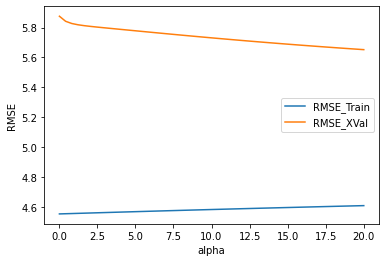

In [104]:
plt.plot(alpha, t_rmse, label = 'RMSE_Train')
plt.plot(alpha, cv_rmse, label = 'RMSE_XVal')
plt.legend(('RMSE_Train', 'RMSE_XVal'))
plt.ylabel('RMSE')
plt.xlabel('alpha')
plt.show()

- Lasso는 다른 방법에 비해 Train data에 대한 RMSE는 높지만, 새로운 데이터에 대한 RMSE는 낮음.

In [105]:
a = 0.3
for name,met in [
        ('linear regression', LinearRegression()),
        ('lasso', Lasso(fit_intercept=True, alpha=a)),
        ('ridge', Ridge(fit_intercept=True, alpha=a)),
        ]:
    met.fit(X_train,y_train)
    # p = np.array([met.predict(xi) for xi in x])
    p = met.predict(X_test)
    e = p-y_test
    total_error = np.dot(e,e)
    rmse_train = np.sqrt(total_error/len(p))

    kf = KFold(10)
    err = 0
    for train,test in kf.split(X):
        met.fit(X[train],y[train])
        p = met.predict(X[test])
        e = p-y[test]
        err += np.dot(e,e)

    rmse_10cv = np.sqrt(err/len(X))
    print('Method: %s' %name)
    print('RMSE on training: %.4f' %rmse_train)
    print('RMSE on 10-fold CV: %.4f' %rmse_10cv)


Method: linear regression
RMSE on training: 4.5524
RMSE on 10-fold CV: 5.8770
Method: lasso
RMSE on training: 4.8453
RMSE on 10-fold CV: 5.7637
Method: ridge
RMSE on training: 4.5533
RMSE on 10-fold CV: 5.8487
